# Simple Neural Network Example with TensorFlow

Build a simple neural network (1-layer, no activation function) using TensorFlow

### Import relevant libraries 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generate fake data 

In [24]:
observations = 1000
x = np.random.uniform(low=-10, high=10, size=(observations,1))
y = np.random.uniform(low=-10, high=10, size=(observations,1))
inputs = np.column_stack((x,y)) # stack several 1-D arrays to a single 2-D array

noise = np.random.uniform(-1, 1, (observations,1))
targets = 2 * x - 3 * y + 5 + noise

### Save generated data in .npz file

1. npz is a NumPy file type that can stores N-dimensional arrays 
2. So we need to store data in this way as tensors can be represented in N-dimensional arrays

In [25]:
np.savez('TF_sample', inputs=inputs, targets=targets)

### Solving with TensorFlow 

In [26]:
training_data = np.load('TF_sample.npz')

In [27]:
input_size = 2
output_size = 1

# Build a model 
# lay out the model in 'Sequential', note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # aach 'layer' is listed here
                            # the method 'Dense' indicates, our mathematical operation to be (xw + b)
                            # output will have a shape of (*, units)
                            tf.keras.layers.Dense(units=output_size,
                                                  # kernel_initializer and bias_initializer define the initial values of weights and bias
                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                  bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                                  )
                            ])

# Define optimizer and loss function
# SGD refers to stocahstic gradient default
# MeanSquaredError refers to L-2 norm scaled by number of observations
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
custom_loss = tf.keras.losses.MeanSquaredError()

# 'compile' is the place where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer, loss=custom_loss)

# Train the model
# epochs is the number of iterations
# verbose = 0, means no output is displayed; verbose = 2, means display output
model.fit(training_data['inputs'], training_data['targets'] ,epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 21.6446
Epoch 2/100
1000/1000 - 0s - loss: 1.3350
Epoch 3/100
1000/1000 - 0s - loss: 0.4414
Epoch 4/100
1000/1000 - 0s - loss: 0.3644
Epoch 5/100
1000/1000 - 0s - loss: 0.3913
Epoch 6/100
1000/1000 - 0s - loss: 0.3841
Epoch 7/100
1000/1000 - 0s - loss: 0.4044
Epoch 8/100
1000/1000 - 0s - loss: 0.4197
Epoch 9/100
1000/1000 - 0s - loss: 0.3895
Epoch 10/100
1000/1000 - 0s - loss: 0.3871
Epoch 11/100
1000/1000 - 0s - loss: 0.3924
Epoch 12/100
1000/1000 - 0s - loss: 0.3641
Epoch 13/100
1000/1000 - 0s - loss: 0.3928
Epoch 14/100
1000/1000 - 0s - loss: 0.3868
Epoch 15/100
1000/1000 - 0s - loss: 0.3554
Epoch 16/100
1000/1000 - 0s - loss: 0.3899
Epoch 17/100
1000/1000 - 0s - loss: 0.3965
Epoch 18/100
1000/1000 - 0s - loss: 0.3933
Epoch 19/100
1000/1000 - 0s - loss: 0.3998
Epoch 20/100
1000/1000 - 0s - loss: 0.3709
Epoch 21/100
1000/1000 - 0s - loss: 0.4053
Epoch 22/100
1000/1000 - 0s - loss: 0.3891
Epoch 23/100
1000/1000 - 0s - loss: 0.38

### Extract the weights and bias

In [28]:
# since there's only one layer in this NN, we extract weights/bias from first layer
model.layers[0].get_weights()

[array([[ 2.0652454],
        [-3.0057743]], dtype=float32), array([4.978539], dtype=float32)]

### Plot the predictions 

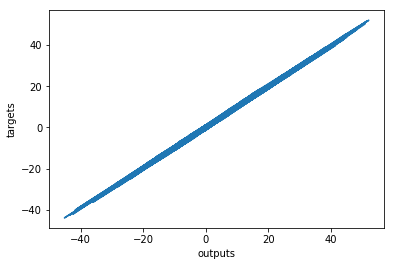

In [29]:
plt.plot(model.predict_on_batch(training_data['inputs']), training_data['targets'])
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()